# GradientBoosting
부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습하는 방식이다. 그 중에서 GBM은 가중치 업데이트를 **경사 하강법**을 이용한다. 정의된 손실 함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습을 진행한다.

In [1]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pip install graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

## 분류(Classification)

In [4]:
df1 = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
df1['target'] = load_breast_cancer().target

In [5]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X1 = df1.iloc[:, :-1]
y1 = np.array(df1['target'])

In [7]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size=0.2, random_state=94)

In [11]:
gbc = GradientBoostingClassifier(random_state=94)
gbc.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=94)

In [12]:
pred = gbc.predict(X1_test)

In [13]:
acc = accuracy_score(y1_test, pred)
acc

0.9912280701754386

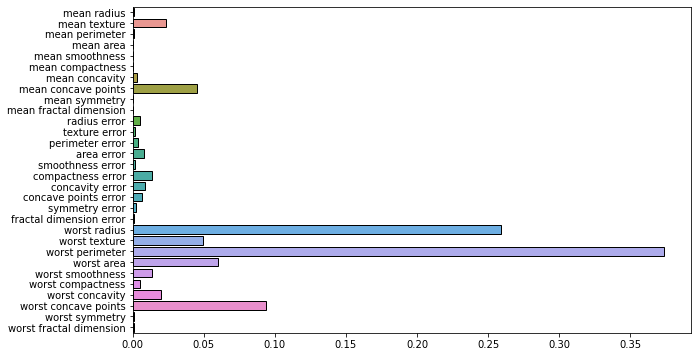

In [14]:
plt.figure(figsize = (10, 6))
sns.barplot(y=X1.columns.tolist(), x=gbc.feature_importances_, edgecolor=(0, 0, 0))
plt.show()

## 회귀(Regression)

In [15]:
df2 = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df2['target'] = load_boston().target
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
X2 = df2.iloc[:, :-1]
y2 = np.array(df2['target'])

In [17]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size=0.2, random_state=94)

In [19]:
gbr = GradientBoostingRegressor(random_state = 423)
gbr.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=423)

In [20]:
pred = gbr.predict(X2_test)

In [21]:
mse = mean_squared_error(y2_test, pred)
mse

7.203133680687956